importing libraries


In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
from sklearn import svm,metrics
from sklearn.metrics import accuracy_score
import random
import math 

Reading and preprossesing our dataset

In [2]:
df = pd.read_csv("/content/sample_data/letter-recognition.csv")
df=df.replace('A','1')
df=df.replace(['B','C','D','E','F','G','E','F','G','H','I','J','K','L','M','N','O','P','Q','R','S','T','U','V','W','X','Y','Z'],'-1')

msk = np.random.rand(len(df)) < 0.8
print(msk.size)
train = df[msk]
test = df[~msk]
m = train;

N=9000
m1=m.sample(N)

X = m1.drop(['target'],axis=1).values   # independent features
y = m1['target']
y1 = y
print(X.shape,y1.shape)

20000
(9000, 16) (9000,)


training initial model g0

In [3]:
svc = svm.SVC(kernel='linear', C=1).fit(X, y1)
g0=svc

defining loss function

In [4]:
def l(smodel,zgiven):
	ans=1-int(float(smodel.predict(zgiven.drop(['target'],axis=1).values[0].reshape(1,-1))[0]))*int(zgiven['target'].values)
	return ans

Execution of the SVM-BM algorithm as given in "SVM-Boosting based on Markov resampling: Theory and algorithm"

In [5]:
# inputs Dtrain,n2,q,N,T
T=20
n2=30
q=1.2
# algorithm
t=1
z1=m.sample()
g=g0
zi=z1
et=[]
while(t<=T):
  cnt=0
  print(t)
  i=1
  n1=0
  given_Dt_list=[]
  
  while(i<=N):
    cnt+=1
    z_star=m.sample()
    p1 = math.exp(-l(g,z_star))
    p2 = math.exp(-l(g,zi))
    pt_iplus1=min(1,p1/p2)
    flag=0

    if (n1>n2):
      flag=1
      pt_iplus1=min(1,q*pt_iplus1)
      zi=z_star
      given_Dt_list.append(zi.index[0])
      i+=1
      n1=0

    yi =int(zi['target'].values)
    y_star =int(z_star['target'].values)
    if (pt_iplus1==1 and yi*y_star==1):
      x = z_star.drop(['target'],axis=1).values[0].reshape(1,-1)
      xi = zi.drop(['target'],axis=1).values[0].reshape(1,-1)
      pt_iplus1 =  math.exp(-y_star)*int(g.predict(x)[0])/(-yi*int(g.predict(xi)[0]))

    if (random.uniform(0,1)<pt_iplus1):
      flag=1
      zi=z_star
      given_Dt_list.append(zi.index[0])
      i+=1
      n1=0
    if (flag==0): 
      n1+=1

  Dt = df.iloc[given_Dt_list]
  Dt_X = Dt.drop(['target'],axis=1).values   # independant features
  Dt_Y = Dt['target']
  g = svm.SVC(kernel='linear', C=1).fit(Dt_X, Dt_Y)
  predict=g.predict(Dt_X)
  # get the accuracy
  e_cnt=1-accuracy_score(Dt_Y, predict)
  et.append(e_cnt)
  alpha_t=1/2*math.log((1-e_cnt)/(e_cnt))
  zi=z_star
  t+=1
  if(alpha_t<0):
    t-=1
  


1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20


plotting the misclassification rates after each epoch

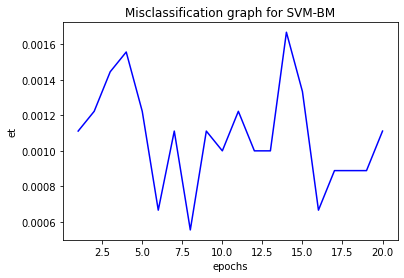

In [6]:
plt.title("Misclassification graph for SVM-BM")  
plt.xlabel("epochs")  
plt.ylabel("et")  
plt.plot(np.arange(1,len(et)+1), et, color ="Blue")  
plt.show()